#Divisive Hierarchical Clustering on Customer Segmentation ( top-down approach. )

Segment customers based on their purchasing behavior using `divisive hierarchical clustering`. This project will help you understand how divisive clustering works and how to apply it to real-world data


##Top-Down Approach
You begin with one large cluster (containing all the data) and split it into smaller clusters repeatedly until each data point is in its own cluster or until you've reached the desired number of clusters.

This is different from the bottom-up approach, known as "`agglomerative hierarchical clustering`," where you start with each data point as its own cluster and then merge them into larger clusters.

## Load the dataset


You can use the Mall Customer Segmentation Data from Kaggle. This dataset contains information about customers, such as their age, annual income, and spending score, which are useful for clustering.

In [75]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


##Data Preprocessing

* Check for any missing values and clean the dataset.
* Select the relevant features for clustering (e.g., 'Annual Income' and  'Spending Score').

In [76]:
# Check for missing values
print('missing values\n\n', data.isnull().sum())

# Select relevant features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
print('\n\nfeatures\n\n',features)

missing values

 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


features

      Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


##Visualize the data points

<ipython-input-77-4cc02fe950bd>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=None, cmap='rainbow')


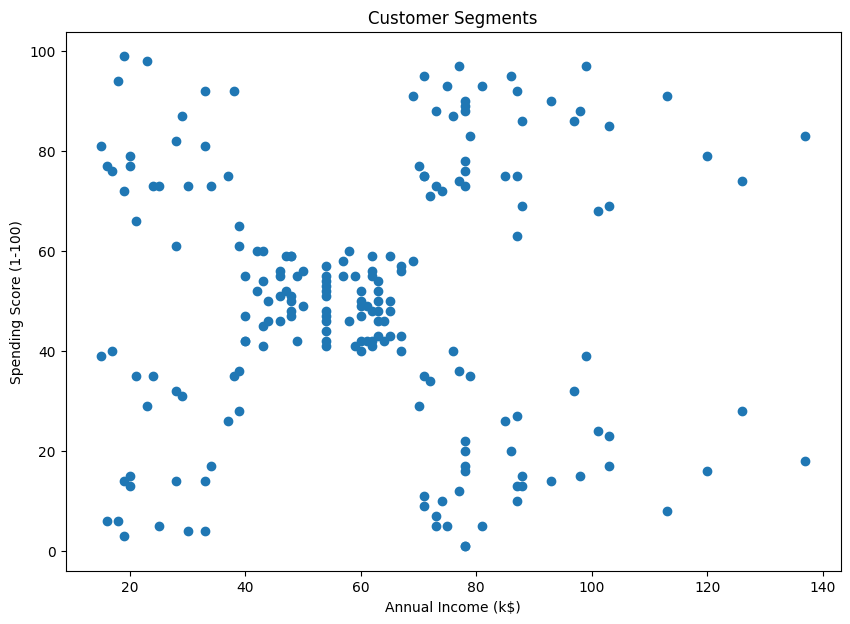

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=None, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()


#Implement Divisive Hierarchical Clustering:

* Implement divisive clustering using scipy's hierarchy module.
* Start with all data points in one cluster and recursively split them

The divisive_clustering function performs divisive hierarchical clustering on a given dataset using the k-means algorithm to recursively split clusters. The goal is to partition the data into a specified number of clusters (num_clusters) by starting with a single large cluster and successively splitting it until the desired number of clusters is reached.

In [83]:
from sklearn.cluster import KMeans
import numpy as np

# Function to recursively split the data using k-means
def divisive_clustering(data, num_clusters):
    clusters = {0: data}
    cluster_labels = np.zeros(len(data), dtype=int)  # Initialize cluster labels for all data points

    current_cluster_id = 0
    next_cluster_id = 1

    while next_cluster_id < num_clusters:
        # Select the cluster to split
        cluster_data = clusters[current_cluster_id]

        # Apply k-means with k=2 to split the cluster
        kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
        kmeans.fit(cluster_data)
        labels = kmeans.labels_

        # Identify the indices of the data points in the original dataset that belong to the current cluster
        cluster_indices = np.where(cluster_labels == current_cluster_id)[0]

        # Update the clusters
        clusters[current_cluster_id] = cluster_data[labels == 0]
        clusters[next_cluster_id] = cluster_data[labels == 1]

        # Update the cluster labels for the entire dataset
        cluster_labels[cluster_indices[labels == 1]] = next_cluster_id

        # Determine the next cluster to split
        current_cluster_id = max(clusters, key=lambda x: len(clusters[x]))
        next_cluster_id += 1

    return cluster_labels

# Apply divisive clustering
num_clusters = 5  # Desired number of clusters
cluster_labels = divisive_clustering(features.values, num_clusters)

# Assign the cluster labels back to the original data
data['Divisive Cluster'] = cluster_labels


##Visualize the Clusters

Plot the clusters to visualize the segmentation of customers

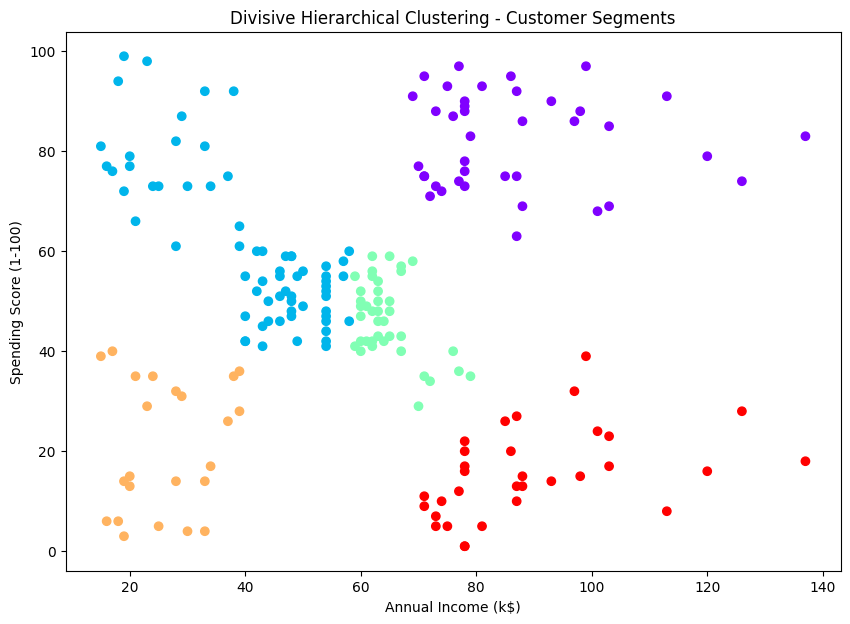

In [84]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Divisive Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Divisive Hierarchical Clustering - Customer Segments')
plt.show()


END